# Module 3 Exercise

In these exercises, we will use ggplot2 functions to plot some statistical plots about a data set. Whether using `R` or `Python`, 
have your ggplot2 cheat sheets and documentation handy to find the right parameters for the functions. Once you choose which language you want to use, then switch the language kernel by clicking the top right corner of a notebook menubar (Not the JupyterLab menubar.) 

Let's read the house sales data.

In [2]:
!pip install -U seaborn[stats] plotnine[all]

In [3]:
# Please uncomment these if you use R
# ---
# library(ggplot2)
# County_data <- read.csv("./kc_house_data.csv",header=TRUE,sep=",")
# head(County_data)


# Please uncomment these if you use Python
# ---
import pandas as pd 
import plotnine as pn
from plotnine import *
County_data = pd.read_csv("./kc_house_data.csv")
County_data.head()

C:\Users\YATISH DURGA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


FileNotFoundError: [Errno 2] No such file or directory: './kc_house_data.csv'

In [ ]:
County_data.columns

In [ ]:
for c,d in County_data.dtypes.items():
    print(f'{c} ---> {d}')

In [16]:
nominal_columns = County_data.select_dtypes(include=['object','category']).columns

In [ ]:
print(nominal_columns)

In [21]:
County_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

There are two rows in the dataset with number of bedrooms greater than 10, but the price is very low. Let's remove those outliers from the data. 

In [ ]:
# Please uncomment this if you use R
# ---
# County_data <- County_data[!County_data$bedrooms>10,]

# Please uncomment this if you use Ptyhon
# ---
County_data = County_data.loc[County_data.bedrooms<=10]

**Exercise 1:** Use a function or method to summarize the data structure and give your best guess about which atrributes are **nominal** variables. **Justify your answer.** 

In [ ]:
nominal_columns = County_data.select_dtypes(include=['object','category']).columns

**JUSTIFY YOUR ANSWER HERE**

**Exercise 2:** Map the **sqft_living** and **price** attributes to x and y axes of a scatter plot, respectively. Use some alpha transparency.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'your_data' is your dataset (Pandas DataFrame)
# Replace 'your_data' with the actual variable name of your DataFrame
# Assuming 'sqft_living' and 'price' are column names in your DataFrame

plt.figure(figsize=(10, 6))

# Scatter plot with alpha transparency using Seaborn
sns.scatterplot(data=County_data, x='sqft_living', y='price', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot of sqft_living vs. price')
plt.xlabel('sqft_living')
plt.ylabel('price')

# Show the plot
plt.show()


We can't really see anything here, let's try the same plot with log scales. 

**Exercise 3:** Plot the above axes (**both x and y**) in log10 scale. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'your_data' is your dataset (Pandas DataFrame)
# Replace 'your_data' with the actual variable name of your DataFrame
# Assuming 'sqft_living' and 'price' are column names in your DataFrame

plt.figure(figsize=(10, 6))

# Scatter plot with log10 scale for both axes
plt.scatter(np.log10(County_data['sqft_living']), np.log10(County_data['price']), alpha=0.3)

# Adding labels and title
plt.title('Scatter Plot of log10(sqft_living) vs. log10(price)')
plt.xlabel('log10(sqft_living)')
plt.ylabel('log10(price)')

# Show the plot
plt.show()


This gives a better relation between price and square footage. 


Let's plot a histogram of price; it is the distribution of prices for all houses. 

**Exercise 4:** Plot a **histogram** of **price** with a **binwidth** of 30000.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'your_data' is your dataset (Pandas DataFrame)
# Replace 'your_data' with the actual variable name of your DataFrame
# Assuming 'price' is a column name in your DataFrame

plt.figure(figsize=(10, 6))

# Plotting the histogram with a bin width of 30000 using Seaborn
sns.histplot(County_data['price'], bins=np.arange(0, County_data['price'].max() + 30000, 30000), kde=False, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Price with Binwidth 30000')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()


NameError: name 'County_data' is not defined

<Figure size 1000x600 with 0 Axes>

We can also plot the probability density function of the price, it will look like a smoothed version of the histogram.

**Exercise 5:** Plot the density of **price** using **geom_density**. 

In [5]:
plt.figure(figsize=(10, 6))

# Plotting the density of price using Seaborn
sns.kdeplot(County_data['price'], color='skyblue')

# Adding labels and title
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()

NameError: name 'County_data' is not defined

<Figure size 1000x600 with 0 Axes>

Let's work on the subset of the data; we will look only at houses that are less than $2M. 

In [8]:
# Please uncomment this if you use R
# ---
# lowprice_houses <- County_data[County_data$price<2000000,]

# Please uncomment this if you use Ptyhon
# ---
lowprice_houses = County_data.loc[County_data.price<2000000]

NameError: name 'County_data' is not defined


---

We can plot **multiple densities** on the same plot to see how the price distribution differs with respect to some attributes. We should use alpha transparency in `geom_density` to see the different distributions.

**Exercise 6:** Plot multiple densities of **price** with respect to **number of bedrooms**. 

This works well if there aren't too many classes. Here, we can't see much, so let's use the **facet_wrap()** to create **small multiples** to compare densities for different number of bedrooms. 

**Exercise 7:** Plot **small multiples** of **price densities** with respect to **number of bedrooms**. 

In [9]:
plt.figure(figsize=(12, 8))

# Plotting small multiples of price densities with respect to number of bedrooms using Seaborn
sns.kdeplot(data=County_data, x='price', hue='bedrooms', fill=True, alpha=0.5, common_norm=False)
plt.title('Density Plot of Price with Respect to Number of Bedrooms')

# Using facet_wrap to create small multiples based on the 'bedrooms' column
g = sns.FacetGrid(County_data, col='bedrooms', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'price', fill=True, alpha=0.5, common_norm=False)

# Adding labels and title
g.set_axis_labels('Price', 'Density')

# Show the plot
plt.show()

NameError: name 'County_data' is not defined

<Figure size 1200x800 with 0 Axes>

Here we can see that up to four bedrooms, the price distribution is narrow; after that the variance of the price increases. 
Let's see the distribution for number of floors.

**Exercise 8:** Plot **small multiples** of **price densities** with respect to **number of floors**. 

C:\Users\rebel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight


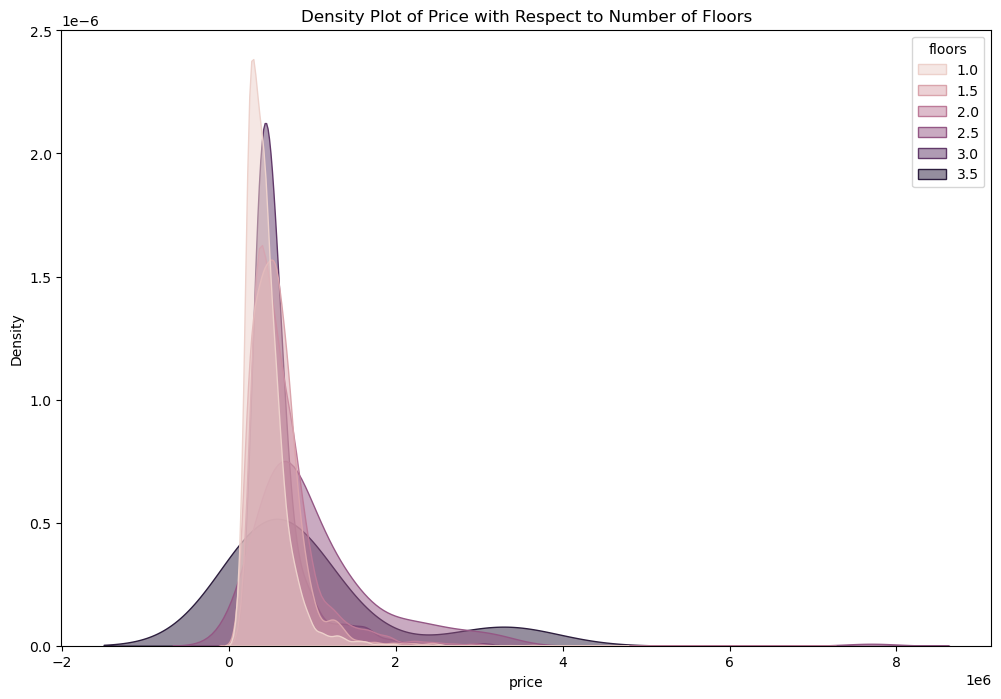

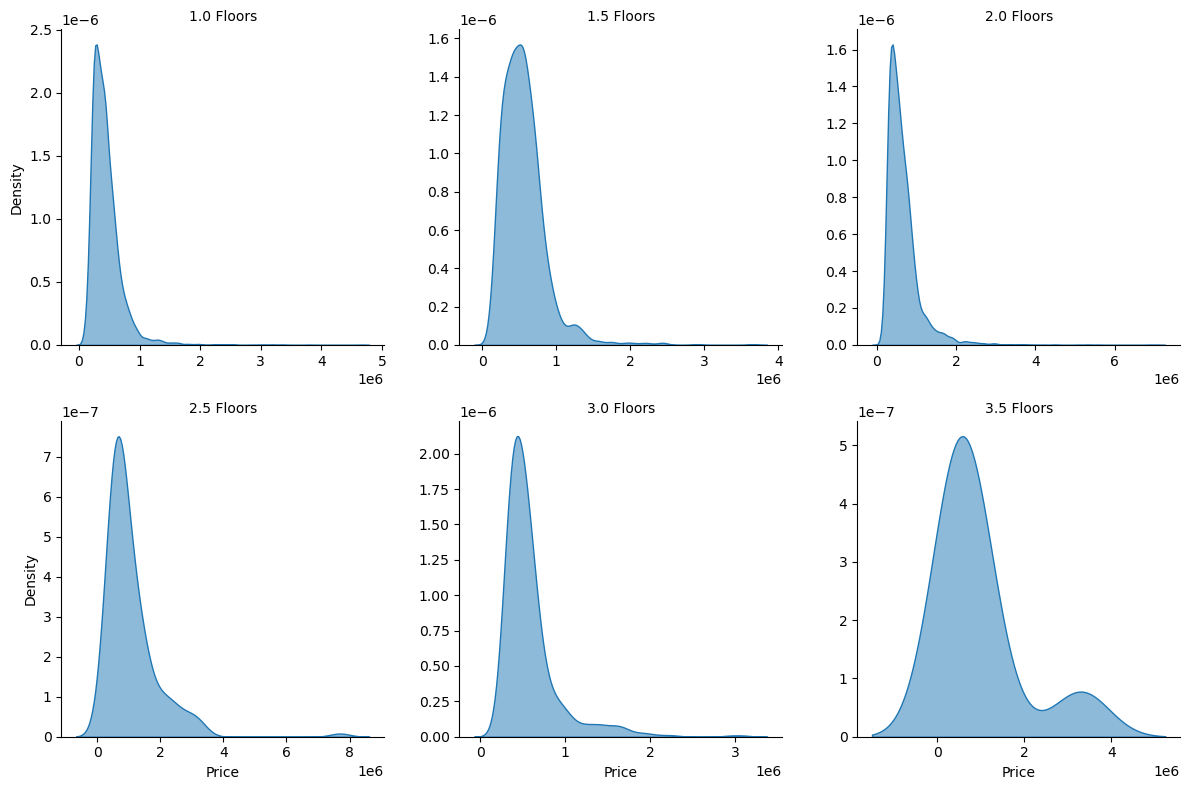

In [88]:
plt.figure(figsize=(12, 8))

# Plotting a single density plot with different colors for each 'floors' category
sns.kdeplot(data=County_data, x='price', hue='floors', fill=True, alpha=0.5, common_norm=False)
plt.title('Density Plot of Price with Respect to Number of Floors')

# Using FacetGrid to create small multiples based on the 'floors' column
g = sns.FacetGrid(County_data, col='floors', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'price', fill=True, alpha=0.5, common_norm=False)

# Adding labels and title to the FacetGrid
g.set_axis_labels('Price', 'Density')
g.set_titles(col_template="{col_name} Floors")

# Show the plot
plt.show()

Let's plot a scatter plot for price vs. square footage using small multiples for number of bedrooms. Map the number of floors to *color* visual variable using a **sequential** brewer palette.

**Exercise 9:** Do a scatter plot of **price** vs. **square footage** with **small multiples** of **bedrooms**. 

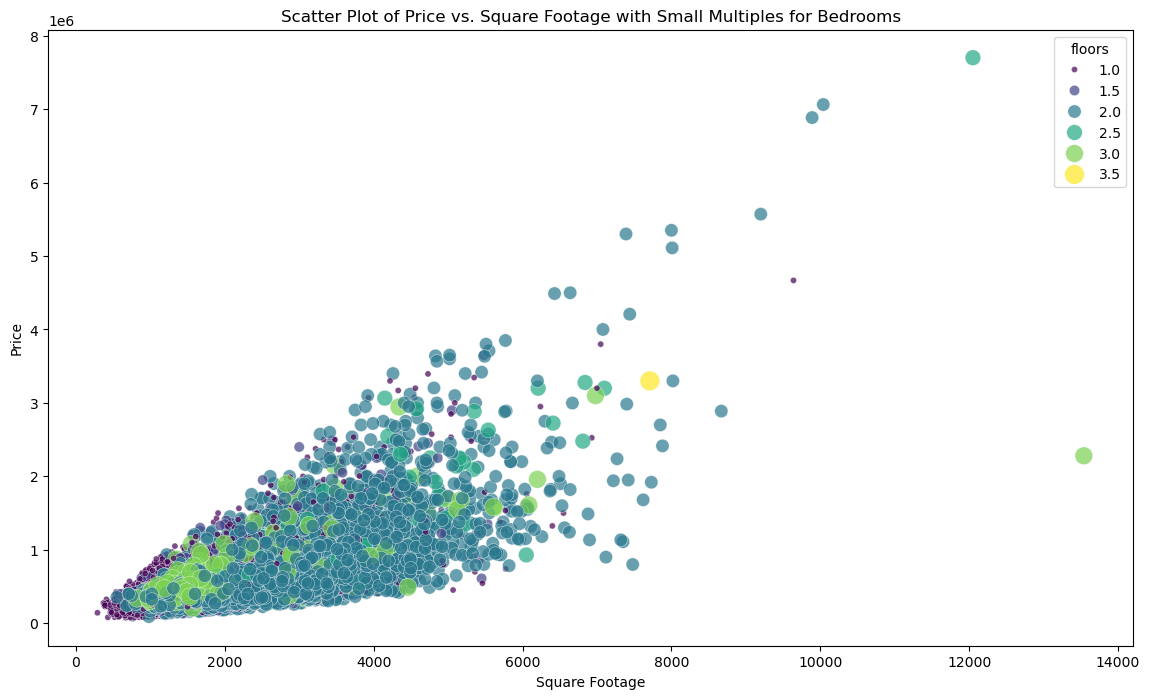

In [41]:
plt.figure(figsize=(14, 8))

# Scatter plot with small multiples for number of bedrooms and color mapped to number of floors
sns.scatterplot(data=County_data, x='sqft_living', y='price', hue='floors', size='floors', palette='viridis', sizes=(20, 200), alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot of Price vs. Square Footage with Small Multiples for Bedrooms')
plt.xlabel('Square Footage')
plt.ylabel('Price')

# Show the plot
plt.show()

**Exercise 10:** Let's make both axes log scale. 

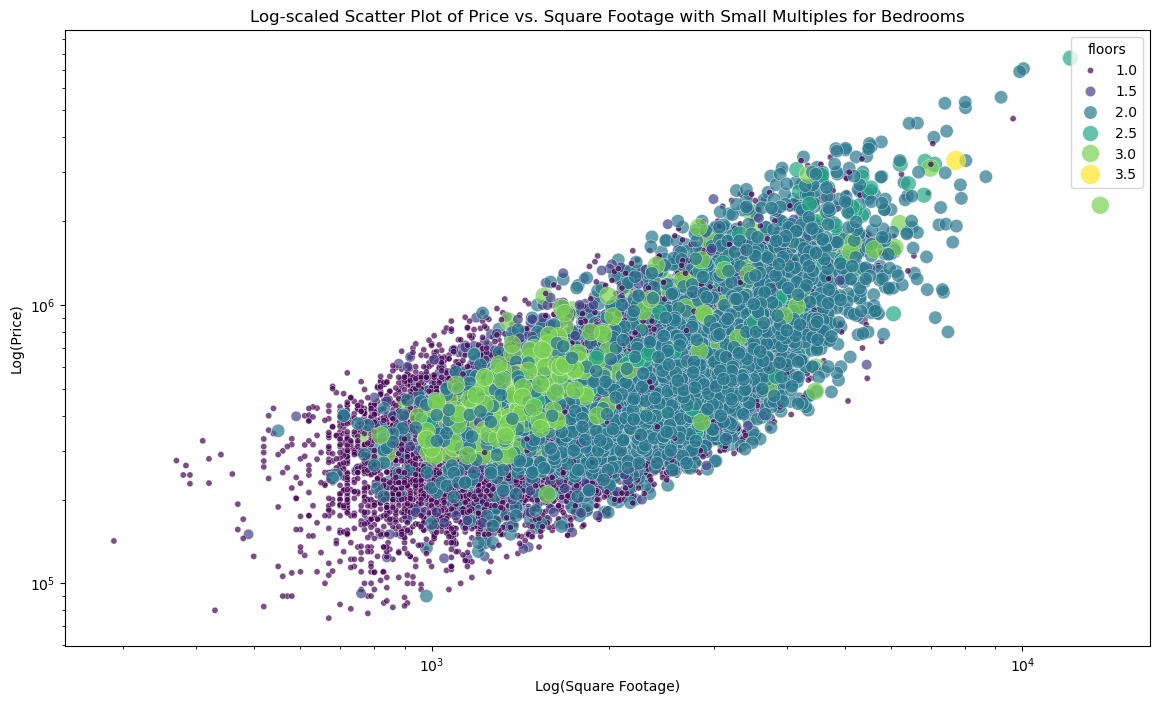

In [42]:
# YOUR CODE HERE
plt.figure(figsize=(14, 8))

# Scatter plot with log scale for both axes, small multiples for number of bedrooms, and color mapped to number of floors
sns.scatterplot(data=County_data, x='sqft_living', y='price', hue='floors', size='floors', palette='viridis', sizes=(20, 200), alpha=0.7)

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.title('Log-scaled Scatter Plot of Price vs. Square Footage with Small Multiples for Bedrooms')
plt.xlabel('Log(Square Footage)')
plt.ylabel('Log(Price)')

# Show the plot
plt.show()

---


**Let's look at a different data set. This one is about a survey of students enrolled in a class, and some information about them was collected about their behavior, demographics, etc.** 

In [51]:
# Please uncomment these if you use R
# ---
# ecg = read.csv("./eyecolorgenderdata.csv",header=TRUE,sep=",")
# head(ecg)

# Please uncomment these if you use Python
# ---
ecg = pd.read_csv("./eyecolorgenderdata.csv")
ecg.head()

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


**Exercise 11:** Name the **nominal** and **ordinal** variables in this data set. 

In [52]:
# YOUR CODE HERE
for c,d in ecg.dtypes.items():
    print(f'{c} ---> {d}')

gender ---> object
age ---> int64
year ---> object
eyecolor ---> object
height ---> int64
miles ---> float64
brothers ---> int64
sisters ---> int64
computertime ---> float64
exercise ---> object
exercisehours ---> float64
musiccds ---> float64
playgames ---> float64
watchtv ---> float64


In [53]:
ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         1990 non-null   object 
 1   age            1990 non-null   int64  
 2   year           1990 non-null   object 
 3   eyecolor       1990 non-null   object 
 4   height         1990 non-null   int64  
 5   miles          1990 non-null   float64
 6   brothers       1990 non-null   int64  
 7   sisters        1990 non-null   int64  
 8   computertime   1990 non-null   float64
 9   exercise       1990 non-null   object 
 10  exercisehours  1990 non-null   float64
 11  musiccds       1989 non-null   float64
 12  playgames      1990 non-null   float64
 13  watchtv        1990 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 217.8+ KB


**YOUR ANSWER HERE**

In [57]:
nominal_columns = ecg.select_dtypes(include=['object','category']).columns
print(nominal_columns)

Index(['gender', 'year', 'eyecolor', 'exercise'], dtype='object')


**Exercise 12:** Plot a scatter plot of **gender** vs. **eyecolor**.

In [61]:
distinct_eye_colors = ecg['eyecolor'].unique()

print(distinct_eye_colors)

['hazel' 'brown' 'green' 'blue' 'other']


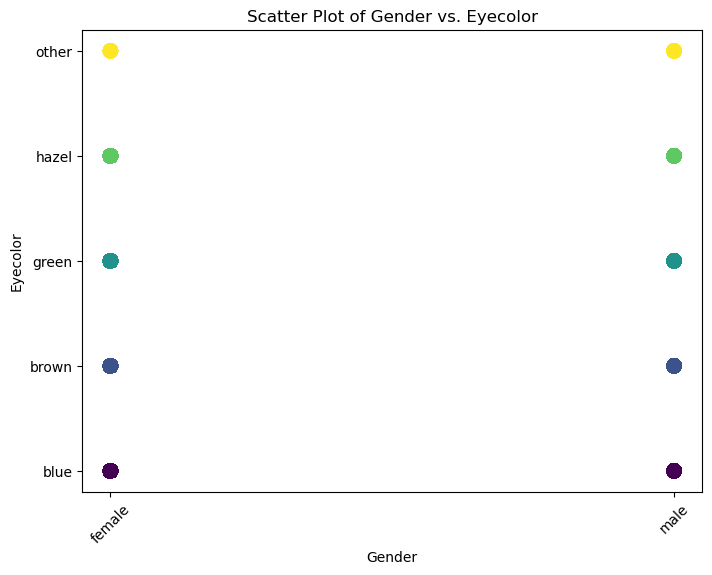

In [62]:
color_mapping = {'blue': 0, 'brown': 1, 'green': 2, 'hazel':3, 'other':4 }
ecg['eyecolor_mapped'] = ecg['eyecolor'].map(color_mapping)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ecg['gender'], ecg['eyecolor_mapped'], c=ecg['eyecolor_mapped'], cmap='viridis', s=100)
plt.xlabel('Gender')
plt.ylabel('Eyecolor')
plt.title('Scatter Plot of Gender vs. Eyecolor')
plt.xticks(rotation=45)
plt.yticks(range(len(color_mapping)), list(color_mapping.keys()))
plt.show()

This didn't work well. When we have overplotting problem where attributes have same exact values for a large number of data rows, we should use geom_jitter() to randomly place points in a scatter plot.

**Exercise 13:** Plot a scatter plot of **gender** vs. **eyecolor** with **jitter** geometry. 

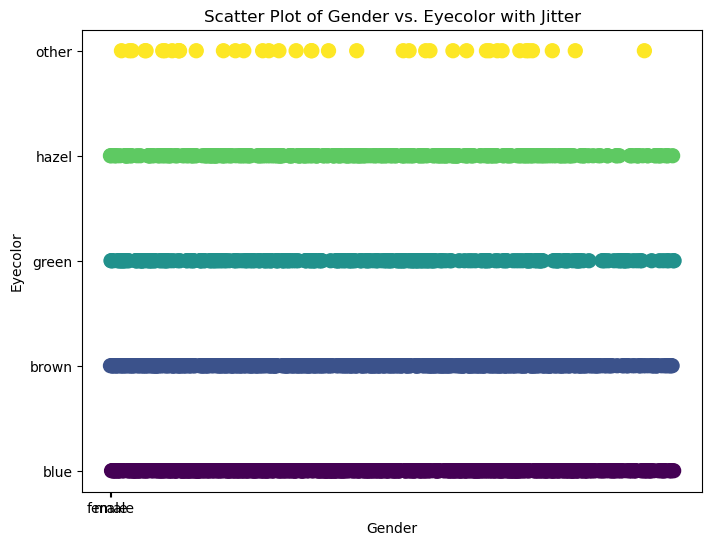

In [68]:
color_mapping = {'blue': 0, 'brown': 1, 'green': 2, 'hazel': 3, 'other': 4}
ecg['eyecolor_mapped'] = ecg['eyecolor'].str.lower().map(color_mapping)

# Scatter plot with jitter using matplotlib and numpy
jitter_strength = 0.1

# Add jitter to x-axis values
ecg['gender_jittered'] = ecg.groupby('gender').cumcount() + np.random.uniform(-jitter_strength, jitter_strength, len(ecg))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(ecg['gender_jittered'], ecg['eyecolor_mapped'], c=ecg['eyecolor_mapped'], cmap='viridis', s=100)
plt.xlabel('Gender')
plt.ylabel('Eyecolor')
plt.title('Scatter Plot of Gender vs. Eyecolor with Jitter')
plt.xticks(np.arange(len(ecg['gender'].unique())), ecg['gender'].unique())
plt.yticks(range(len(color_mapping)), list(color_mapping.keys()))
plt.show()

It's intuitive to use **color** visual variable for the **eyecolor** attribute.

**Exercise 14:** Plot a scatter plot of **gender** vs. **eyecolor** and use **color** for the **eyecolor** attribute. Adjust width and height of **jitter** suitably and add transparency. 

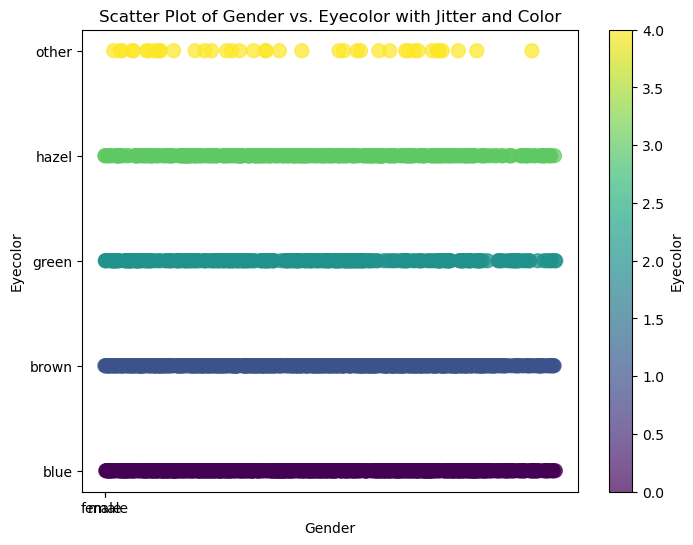

In [69]:
# YOUR CODE HERE
color_mapping = {'blue': 0, 'brown': 1, 'green': 2, 'hazel': 3, 'other': 4}
ecg['eyecolor_mapped'] = ecg['eyecolor'].str.lower().map(color_mapping)

# Scatter plot with color representing eyecolor, jitter, and transparency
jitter_strength = 0.2
transparency = 0.7

# Add jitter to x-axis values
ecg['gender_jittered'] = ecg.groupby('gender').cumcount() + np.random.uniform(-jitter_strength, jitter_strength, len(ecg))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(
    ecg['gender_jittered'],
    ecg['eyecolor_mapped'],
    c=ecg['eyecolor_mapped'],
    cmap='viridis',
    s=100,
    alpha=transparency
)

plt.xlabel('Gender')
plt.ylabel('Eyecolor')
plt.title('Scatter Plot of Gender vs. Eyecolor with Jitter and Color')
plt.xticks(np.arange(len(ecg['gender'].unique())), ecg['gender'].unique())
plt.yticks(range(len(color_mapping)), list(color_mapping.keys()))
plt.colorbar(label='Eyecolor')  # Add colorbar for eyecolor mapping
plt.show()

The colors should be intuitive, so we will manually name them with **scale_color_manual()** where the color values will be 
c("blue", "chocolate4", "green4", "#595c26", "black").

**Exercise 15:** Add manual colors to the above plot.

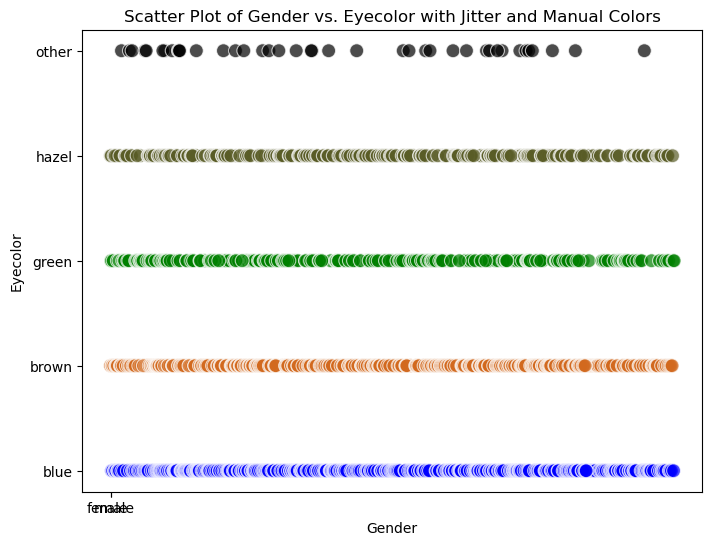

In [98]:
# YOUR CODE HERE
manual_colors = ["blue", "chocolate", "green", "#595c26", "black"]
markers = ['o', 's', '^']

# Plotting with seaborn and manual color scale
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='gender_jittered',
    y='eyecolor_mapped',
    hue='eyecolor_mapped',
    palette=manual_colors,
    data=ecg,
    s=100,
    alpha=transparency
)

plt.xlabel('Gender')
plt.ylabel('Eyecolor')
plt.title('Scatter Plot of Gender vs. Eyecolor with Jitter and Manual Colors')
plt.xticks(np.arange(len(ecg['gender'].unique())), ecg['gender'].unique())
plt.yticks(range(len(color_mapping)), list(color_mapping.keys()))
scatter_plot.get_legend().remove()  # Remove default legend
plt.show()

**Exercise 16:** And finally add **shape** visual variable to encode the **exercise** attribute. **Does it work well? Why?** 


**YOUR ANSWER HERE**


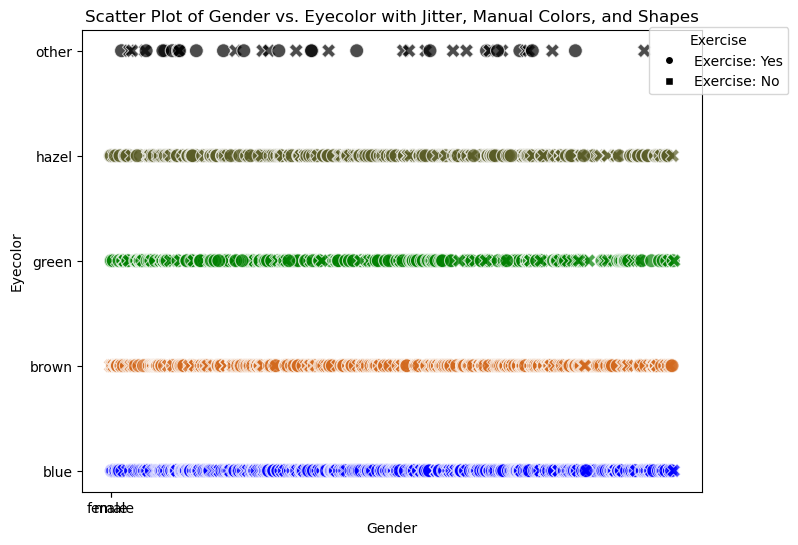

In [106]:
# YOUR CODE HERE
manual_colors = ["blue", "chocolate", "green", "#595c26", "black"]
markers = ['o', 's', '^']

# Plotting with seaborn and manual color and shape scale
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='gender_jittered',
    y='eyecolor_mapped',
    hue='eyecolor_mapped',
    palette=manual_colors,
    style='exercise',  # Add shape encoding for 'exercise'
    data=ecg,
    s=100,
    alpha=transparency
)

plt.xlabel('Gender')
plt.ylabel('Eyecolor')
plt.title('Scatter Plot of Gender vs. Eyecolor with Jitter, Manual Colors, and Shapes')
plt.xticks(np.arange(len(ecg['gender'].unique())), ecg['gender'].unique())
plt.yticks(range(len(color_mapping)), list(color_mapping.keys()))

# Remove default legend
scatter_plot.get_legend().remove()

# Add custom legend
legend_handles = [plt.Line2D([0], [0], marker=marker, color='w', label=f'Exercise: {exercise}', markerfacecolor='black') for marker, exercise in zip(markers, ecg['exercise'].unique())]
plt.legend(handles=legend_handles, title='Exercise', loc='upper right', bbox_to_anchor=(1.15, 1.02))

plt.show()


**Exercise 17:** Plot a scatter plot of **gender** vs. **height** with **small multiples** for **exercise**. 

**Use the techniques you applied in the above exercises. Use intuitive visual variables for the attributes.** 


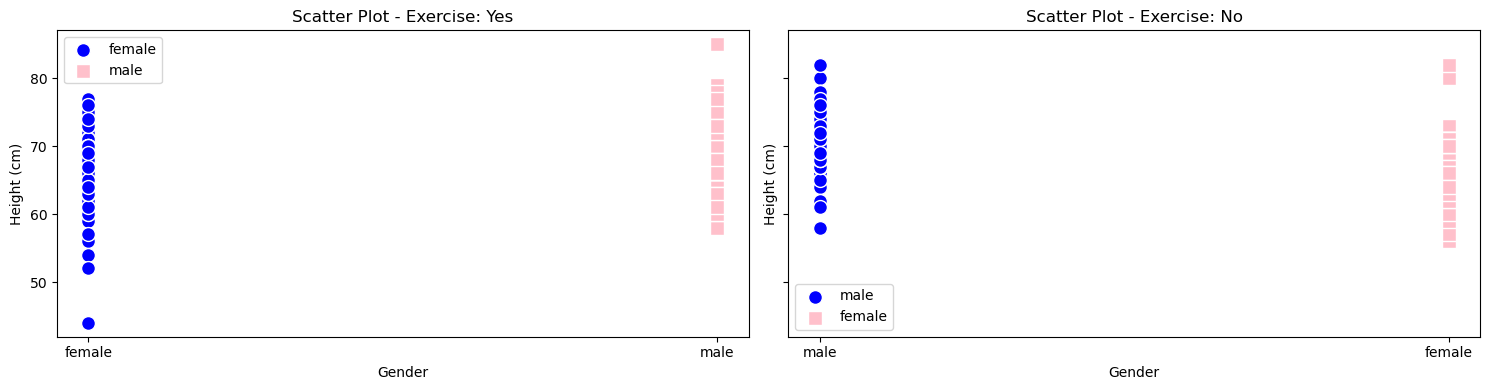

In [114]:
gender_colors = {'Male': 'blue', 'Female': 'pink'}
exercise_markers = {'Low': 'o', 'Medium': 's', 'High': '^'}

# Get unique exercise levels
exercise_levels = ecg['exercise'].unique()

# Create subplots for each exercise level
fig, axes = plt.subplots(nrows=1, ncols=len(exercise_levels), figsize=(15, 4), sharey=True)

for ax, exercise_level in zip(axes, exercise_levels):
    # Filter data for the current exercise level
    subset_data = ecg[ecg['exercise'] == exercise_level]
    
    # Plot scatter plot for 'gender' vs. 'height'
    for gender, color, marker in zip(subset_data['gender'].unique(), gender_colors.values(), exercise_markers.values()):
        subset_gender = subset_data[subset_data['gender'] == gender]
        ax.scatter(subset_gender['gender'], subset_gender['height'], c=color, marker=marker, label=gender, s=100, edgecolor='w')

    # Set labels and title for the subplot
    ax.set_xlabel('Gender')
    ax.set_ylabel('Height (cm)')
    ax.set_title(f'Scatter Plot - Exercise: {exercise_level}')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Please Save the file, then submit to Blackboard (File -> Save Notebook)